# Fiche n°2 : Première exploitation, premier modèle

L’étude de la chronophotographie de la chute d’une bille est ici reprise avec le début du script précédent.

**Capacité numérique mise en œuvre** : représenter les positions successives d’un système modélisé par un point lors d’une évolution unidimensionnelle ou bidimensionnelle à l’aide d’un langage de programmation.


In [0]:
import numpy as np              # on importe numpy
import matplotlib.pyplot as plt # on importe matplotlib

# on définit un tableau du type array
ymes=np.array([-0,-0.7,-1.5,-2.3,-3.5,-4.5,-5.9,-7.7,-8.8,-10.6,-12.3,-14.2,-16.4,-18.5,-21,-23.5]) 

yreelle=ymes*2/100      # on convertit ymes en yreelle
t=np.linspace(0,1/4,16) # on définit un tableau de 16 valeurs allant de 0 à 1/4 

## 1. Représentation de la chute

En affectant une abscisse constante x, il est possible d’obtenir le tracé des positions successives de la bille et ainsi recréer la chronophotographie. Le script précédent est repris en indiquant que x est nul pour tout t. Cela s’écrit sous la forme x = 0*t. Cette écriture est rendue nécessaire car la fonction plt.plot doit disposer de deux listes ayant le même nombre de valeurs. La liste yreelle contient 14 valeurs. L’abscisse doit également en contenir 14, ce qui ne serait pas le cas si l’on écrivait seulement x = 0. Une manière d’écrire cela est : 

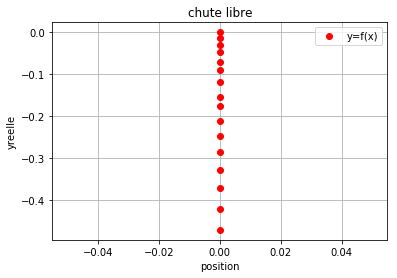

In [8]:
x=0*t                                   # on définit une abscisse nulle, ce qui permettra de tracer en fonction de l'abscisse
plt.plot(x,yreelle,'ro',label="y=f(x)") # on trace yreelle en fonction de x 
plt.xlabel("position")                  # pour le reste, il s'agit des options classiques de tracé
plt.ylabel("yreelle")
plt.grid()
plt.legend()
plt.title("chute libre")
plt.show()

## 2. Premier modèle automatique

Dans un premier temps, il est possible d’appeler la fonction **np.polyfit** qui modélise une fonction par un polynôme de degré laissé au choix de l’utilisateur. En choisissant un polynôme d’ordre 2, **np.polyfit** recherche la fonction qui à t associe : $a.t^2 + b.t + c$. En nommant la fonction modèle, **np.polyfit** renvoie un tableau avec les valeurs de a, b et c. Il est alors possible d’afficher l’une des valeurs de ce tableau (par exemple, la première) grâce à **print(mod[0])** (la numérotation de python commence toujours à 0 et non à 1). Ainsi, par comparaison avec les expressions littérales du mouvement, il est possible d’obtenir les valeurs de la constate de gravitation $g= - 2.a$, de la vitesse verticale initiale $v_0 = b$ et de la position initiale $z_0=c$. Cela peut être écrit ainsi : 

In [9]:
mod=np.polyfit(t,yreelle,2) # on fait modéliser yreelle en fonction de t par un polynôme d'ordre 2, type at^2+bt+c
                            # Attention : cette fonction n'est pas un ensemble de valeurs mais simplement une fonction
                            # donc un objet de dimension 1. Pour pouvoir faire tracer cette fonction, il faudra dans la suite définir 
                            # une fonction modèle qui utilise les paramètres du modèle

# on fait afficher les trois paramètres de ce polynôme modèle d'ordre 2 : a, b et c         
print('mod :', mod)

mod : [-4.64117647e+00 -7.09235294e-01 -6.81372549e-04]


In [10]:
print('g = ',-mod[0]*2) # on fait afficher g=-2a
print('vo = ', mod[1])  # on fait afficher v0=b
print('yo = ',mod[2])   # on fait afficher y0=c

g =  9.282352941176475
vo =  -0.7092352941176467
yo =  -0.0006813725490196418


**Conclusion** : la valeur modèle de g ne paraît pas trop éloignée de la valeur tabulée. Il faut maintenant réfléchir aux chiffres significatifs. 

## 3. Représentation du modèle

Il est ensuite possible de superposer la courbe issue de la modélisation et les points expérimentaux : 

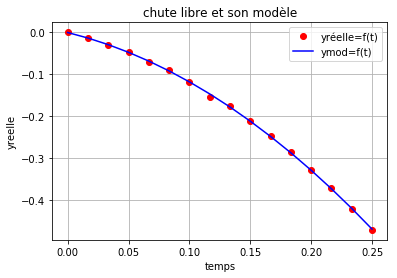

In [11]:
ymod=mod[0]*t**2+mod[1]*t+mod[2]              # on définit la fonction modèle avec les grandeurs a, b et c déterminées précédemment.
plt.plot(t,yreelle,'ro',label="yréelle=f(t)") # on fait tracer yreelle en fonction de t
plt.plot(t,ymod,'b-',label="ymod=f(t)")       # sur le même graphe, on fait tracer en trait bleu la fonction modèle ymod
plt.xlabel("temps")                           # dans la suite, il s'agit des options classiques de tracé
plt.ylabel("yreelle")
plt.grid()
plt.legend()
plt.title("chute libre et son modèle")
plt.show()